# Node2Vec Script

This script is used to generate the Node2Vec results.

This script requires following datasets:

- 'DataFrame'
- 'clean_data'
- 'embeddings'
- 'embeddings_test'
- 'TEST_DF'


In [1]:
# import all required packages
import time
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
plt.style.use('ggplot')

import seaborn as sns
import statsmodels.api as sm

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

import sklearn.metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

## Load and pre-process the data

In [2]:
# used for scaling numerical data within the range of 1 - 5 
def normalize(x):
    return (x-x.min())/(x.max()-x.min()) * (5-1) + 1

In [3]:
df = pd.read_csv('DataFrame')
X = pd.read_csv('clean_data')

In [4]:
X.drop(columns=['Unnamed: 0'],inplace=True)
X.Class = X.Class.apply(lambda x: 1 if x == 0 else(2 if x == 1 else 3))

In [5]:
features = pd.Series(X.satisfaction) 

In [6]:
x_var = X.drop(columns=['satisfaction'])
x_wd = pd.get_dummies(data=x_var,columns=['Customer Type','Type of Travel','Gender'])
x_wd[['Age','Departure Delay in Minutes','Flight Distance']] = normalize(x_wd[['Age','Departure Delay in Minutes','Flight Distance']])

In [7]:
# node2vec train data
t = pd.read_csv('embeddings', delimiter = " ", index_col=0, header = None)
t.sort_index(inplace=True)
t = t.to_numpy()
t.shape

(6000, 2)

In [8]:
Z = pd.DataFrame(t,columns = ['x1','x2'])

In [9]:
# node2vec train
XXXX = pd.DataFrame()
#XXXX = x_wd.copy(deep=True)
XXXX['z1'] = Z.x1
XXXX['z2'] = Z.x2
#XXXX['z3'] = Z.x3
#XXXX['z4'] = Z.x4
#XXXX['z5'] = Z.x5
XXXX_label = pd.get_dummies(features)
XXXX

,z1,z2
0,-2.182478,-1.100291
1,1.367040,-1.080112
2,1.113928,-1.034789
3,0.160458,-0.891286
4,-2.345489,-1.135601
...,...,...
5995,-2.270933,-1.119560
5996,-2.452666,-1.176118
5997,-2.381334,-1.126160
5998,-2.257186,-1.132487


In [10]:
# node2vec test
t_test = pd.read_csv('embeddings_test', delimiter = " ", index_col=0, header = None)
t_test.sort_index(inplace=True)
t_test = t_test.to_numpy()
t_test.shape

(6000, 2)

In [11]:
Z_test = pd.DataFrame(t_test,columns = ['x1','x2'])

## Load and pre-process test data

In [12]:
n2v_test_df = pd.read_csv('TEST_DF')
n2v_test_df.drop(columns=['Unnamed: 0'],inplace=True)
n2v_test_label = n2v_test_df.satisfaction
n2v_test_feats = n2v_test_df.drop(columns=['satisfaction'])
n2v_test_feats_dummy = pd.get_dummies(data=n2v_test_feats,columns=['Customer Type','Type of Travel','Gender'])
n2v_test_feats_dummy[['Age','Departure Delay in Minutes','Flight Distance']] = normalize(n2v_test_feats_dummy[['Age','Departure Delay in Minutes','Flight Distance']])

In [13]:
TTTTTT_label = pd.get_dummies(n2v_test_label)
TTTTTT_label_tf = tf.convert_to_tensor(TTTTTT_label)
TTTTTT = pd.DataFrame()
#TTTTTT = n2v_test_feats_dummy.copy(deep=True)
TTTTTT['z1'] = Z_test.x1
TTTTTT['z2'] = Z_test.x2
TTTTTT_tf = tf.convert_to_tensor(TTTTTT)
TTTTTT

,z1,z2
0,1.263135,0.618403
1,1.227722,0.551899
2,0.637869,-0.539068
3,0.713818,-0.362981
4,0.987218,0.193263
...,...,...
5995,0.531026,-0.869078
5996,1.252779,0.602329
5997,0.986113,0.201152
5998,1.264823,0.629945


## ANN Results Node2Vec

In [16]:
x_train, x_test, y_train, y_test = train_test_split(XXXX,XXXX_label, test_size = 0.2, shuffle=True)

In [17]:
x_train_tf = tf.convert_to_tensor(x_train)
x_test_tf = tf.convert_to_tensor(x_test)
y_train_tf = tf.convert_to_tensor(y_train)
y_test_tf = tf.convert_to_tensor(y_test)

model = Sequential()

model.add(Dense(15, activation='relu'))
#model.add(Dense(8, activation='relu'))
model.add(Dense(2, activation='softmax'))
#opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train_tf, y_train_tf,validation_data=(x_test_tf,y_test_tf), epochs=200, batch_size=10)

Epoch 1/200
480/480 [==============================] - 6s 10ms/step - loss: 0.6124 - accuracy: 0.6924 - val_loss: 0.5224 - val_accuracy: 0.7600
Epoch 2/200
480/480 [==============================] - 2s 5ms/step - loss: 0.5139 - accuracy: 0.7658 - val_loss: 0.5211 - val_accuracy: 0.7600
Epoch 3/200
480/480 [==============================] - 1s 3ms/step - loss: 0.5205 - accuracy: 0.7627 - val_loss: 0.5209 - val_accuracy: 0.7617
Epoch 4/200
480/480 [==============================] - 1s 3ms/step - loss: 0.5238 - accuracy: 0.7671 - val_loss: 0.5226 - val_accuracy: 0.7558
Epoch 5/200
480/480 [==============================] - 2s 4ms/step - loss: 0.5083 - accuracy: 0.7729 - val_loss: 0.5228 - val_accuracy: 0.7558
Epoch 6/200
480/480 [==============================] - 1s 3ms/step - loss: 0.5119 - accuracy: 0.7705 - val_loss: 0.5211 - val_accuracy: 0.7583
Epoch 7/200
480/480 [==============================] - 2s 4ms/step - loss: 0.5239 - accuracy: 0.7584 - val_loss: 0.5243 - val_accuracy: 0.755

Epoch 58/200
480/480 [==============================] - 1s 3ms/step - loss: 0.4992 - accuracy: 0.7808 - val_loss: 0.5218 - val_accuracy: 0.7567
Epoch 59/200
480/480 [==============================] - 1s 2ms/step - loss: 0.5105 - accuracy: 0.7693 - val_loss: 0.5223 - val_accuracy: 0.7550
Epoch 60/200
480/480 [==============================] - 1s 3ms/step - loss: 0.5151 - accuracy: 0.7646 - val_loss: 0.5220 - val_accuracy: 0.7558
Epoch 61/200
480/480 [==============================] - 1s 3ms/step - loss: 0.5132 - accuracy: 0.7686 - val_loss: 0.5223 - val_accuracy: 0.7583
Epoch 62/200
480/480 [==============================] - 1s 2ms/step - loss: 0.4995 - accuracy: 0.7798 - val_loss: 0.5219 - val_accuracy: 0.7558
Epoch 63/200
480/480 [==============================] - 2s 4ms/step - loss: 0.5214 - accuracy: 0.7577 - val_loss: 0.5221 - val_accuracy: 0.7558
Epoch 64/200
480/480 [==============================] - 1s 2ms/step - loss: 0.5159 - accuracy: 0.7671 - val_loss: 0.5220 - val_accuracy:

Epoch 115/200
480/480 [==============================] - 1s 3ms/step - loss: 0.5021 - accuracy: 0.7729 - val_loss: 0.5218 - val_accuracy: 0.7558
Epoch 116/200
480/480 [==============================] - 1s 2ms/step - loss: 0.5196 - accuracy: 0.7646 - val_loss: 0.5220 - val_accuracy: 0.7575
Epoch 117/200
480/480 [==============================] - 1s 2ms/step - loss: 0.5176 - accuracy: 0.7620 - val_loss: 0.5231 - val_accuracy: 0.7550
Epoch 118/200
480/480 [==============================] - 1s 1ms/step - loss: 0.5064 - accuracy: 0.7774 - val_loss: 0.5218 - val_accuracy: 0.7575
Epoch 119/200
480/480 [==============================] - 1s 2ms/step - loss: 0.5259 - accuracy: 0.7581 - val_loss: 0.5219 - val_accuracy: 0.7575
Epoch 120/200
480/480 [==============================] - 2s 4ms/step - loss: 0.4980 - accuracy: 0.7757 - val_loss: 0.5225 - val_accuracy: 0.7583
Epoch 121/200
480/480 [==============================] - 1s 3ms/step - loss: 0.5052 - accuracy: 0.7765 - val_loss: 0.5219 - val_ac

480/480 [==============================] - 1s 3ms/step - loss: 0.5289 - accuracy: 0.7594 - val_loss: 0.5244 - val_accuracy: 0.7575
Epoch 172/200
480/480 [==============================] - 1s 3ms/step - loss: 0.5318 - accuracy: 0.7576 - val_loss: 0.5239 - val_accuracy: 0.7550
Epoch 173/200
480/480 [==============================] - 2s 4ms/step - loss: 0.4935 - accuracy: 0.7831 - val_loss: 0.5224 - val_accuracy: 0.7575
Epoch 174/200
480/480 [==============================] - 2s 4ms/step - loss: 0.5054 - accuracy: 0.7684 - val_loss: 0.5222 - val_accuracy: 0.7550
Epoch 175/200
480/480 [==============================] - 1s 3ms/step - loss: 0.5131 - accuracy: 0.7682 - val_loss: 0.5224 - val_accuracy: 0.7550
Epoch 176/200
480/480 [==============================] - 2s 4ms/step - loss: 0.5163 - accuracy: 0.7679 - val_loss: 0.5227 - val_accuracy: 0.7550
Epoch 177/200
480/480 [==============================] - 1s 2ms/step - loss: 0.5131 - accuracy: 0.7637 - val_loss: 0.5223 - val_accuracy: 0.7575

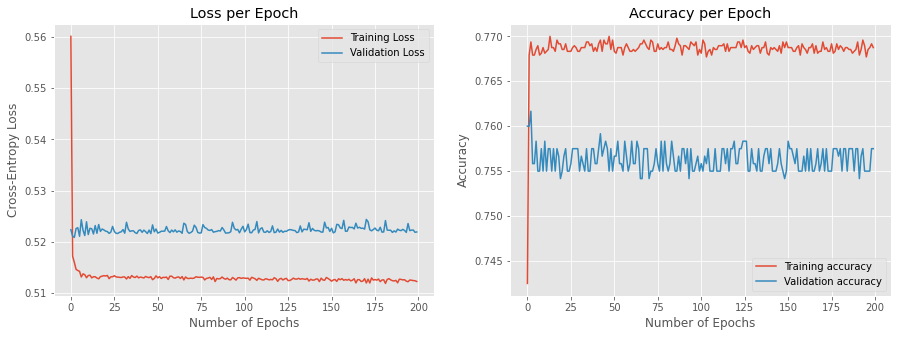

In [18]:
plt.subplots(figsize=(15,5))

plt.subplot(121)
plt.plot(history.history['loss'],label = 'Training Loss')
plt.plot(history.history['val_loss'],label = 'Validation Loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.title('Loss per Epoch')
plt.legend()

plt.subplot(122)
plt.plot(history.history['accuracy'],label = 'Training accuracy')
plt.plot(history.history['val_accuracy'],label = 'Validation accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy per Epoch')
plt.legend()

plt.show()

In [19]:
results = model.evaluate(TTTTTT_tf, TTTTTT_label_tf)
print("test loss, test acc:", results)

188/188 [==============================] - 1s 2ms/step - loss: 0.8254 - accuracy: 0.3212
test loss, test acc: [0.8254051804542542, 0.32116666436195374]


## SVM Results Node2Vec

In [20]:
svm_y = np.empty((len(features),1))

for i in range(len(features)):
    if features.iloc[i] == 1:
        svm_y[i] = 1
    else:
        svm_y[i] = -1

svm_y.astype(int)
x_train, x_test, y_train, y_test = train_test_split(XXXX,svm_y, test_size = 0.2, shuffle=True)

In [21]:
svm_y_test = np.empty((len(n2v_test_label),1))

for i in range(len(n2v_test_label)):
    if n2v_test_label.iloc[i] == 1:
        svm_y_test[i] = 1
    else:
        svm_y_test[i] = -1

In [22]:
clf = svm.SVC(kernel='rbf')
clf.fit(x_train, y_train)
print(clf.score(x_train, y_train))
print(clf.score(x_test, y_test))

/usr/local/Caskroom/miniconda/base/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.7670833333333333
0.7675


In [23]:
y_pred = clf.predict(TTTTTT)
print(clf.score(TTTTTT, svm_y_test))
print(sklearn.metrics.f1_score(y_pred, svm_y_test,average='micro'))

0.4205
0.4205


## Random Forest Results Node2Vec

In [24]:
clf = RandomForestClassifier(max_depth=None, random_state=0)

clf.fit(x_train, y_train)
print(clf.score(x_train, y_train))
print(clf.score(x_test, y_test))

<ipython-input-24-dabfb3d76502>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_train, y_train)


0.9995833333333334
0.715


In [25]:
y_pred = clf.predict(TTTTTT)
print(clf.score(TTTTTT, svm_y_test))
print(sklearn.metrics.f1_score(y_pred, svm_y_test))

0.43316666666666664
0.5885057471264368


## AdaBoost Results Node2Vec

In [26]:
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(x_train, y_train)
y_pred = clf.predict(TTTTTT)
print(clf.score(x_train, y_train))
print(clf.score(x_test, y_test))
print(clf.score(TTTTTT, svm_y_test))
print(sklearn.metrics.f1_score(y_pred, svm_y_test))

/usr/local/Caskroom/miniconda/base/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.7704166666666666
0.7666666666666667
0.585
0.10752688172043011


## Naive Bayes Results Node2Vec

In [27]:
clf = GaussianNB()
clf.fit(x_train, y_train)
y_pred = clf.predict(TTTTTT)
print(clf.score(x_train, y_train))
print(clf.score(x_test, y_test))
print(clf.score(TTTTTT, svm_y_test))
print(sklearn.metrics.f1_score(y_pred, svm_y_test))

0.755625
0.7675
0.5698333333333333
0.0061609549480169425


/usr/local/Caskroom/miniconda/base/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


## QDA Results Node2Vec

In [28]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

clf = QDA()
clf.fit(x_train, y_train)
print(clf.score(x_train, y_train))
print(clf.score(x_test, y_test))
print(clf.score(TTTTTT, svm_y_test))

0.7620833333333333
0.7641666666666667
0.5701666666666667


/usr/local/Caskroom/miniconda/base/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


## Logistic Regression Results Node2Vec

In [29]:
x_train, x_test, y_train, y_test = train_test_split(XXXX,features, test_size = 0.2, shuffle=True)
clf = LogisticRegression(random_state=0,max_iter=500).fit(x_train, y_train)
y_pred = clf.predict(TTTTTT)
print(clf.score(x_train, y_train))
print(clf.score(x_test, y_test))
print(clf.score(TTTTTT, n2v_test_label))

0.7710416666666666
0.75
0.5705


### Statsmodels Output

In [14]:
P = sm.add_constant(t) 
log_reg = sm.Logit(features, P).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.517356
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:           satisfaction   No. Observations:                 6000
Model:                          Logit   Df Residuals:                     5997
Method:                           MLE   Df Model:                            2
Date:                Sun, 11 Jul 2021   Pseudo R-squ.:                  0.2427
Time:                        15:51:24   Log-Likelihood:                -3104.1
converged:                       True   LL-Null:                       -4099.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.7051      0.366    -10.135      0.000      -4.422      -2.989
x1             0.9593      0.

In [32]:
predictions = log_reg.predict(P) 

yhat_log = np.empty((len(predictions),1))

for i in range(len(predictions)):
    if predictions[i] < 0.5:
        yhat_log[i] = 0
    else:         
        yhat_log[i] = 1

print('Classification Accuracy validation set {}'.format(accuracy_score(features,yhat_log)))
print('-------------------------------------------------------------')
print('Confusion Matrix validation set:')
print(confusion_matrix(features,yhat_log))

Classification Accuracy validation set 0.7668333333333334
-------------------------------------------------------------
Confusion Matrix validation set:
[[2612  811]
 [ 588 1989]]


## Scatterplots

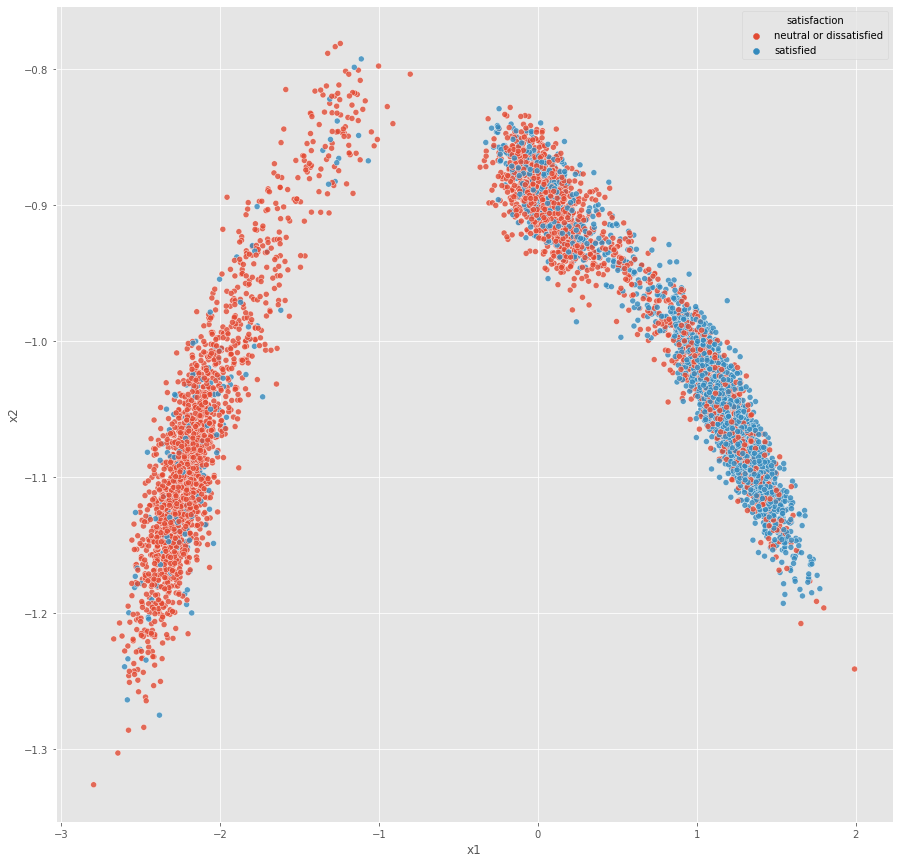

In [30]:
plt.figure(figsize=(15,15))
sns.scatterplot(x=Z.x1,y=Z.x2,hue=df['satisfaction'],alpha=0.8)
plt.show()

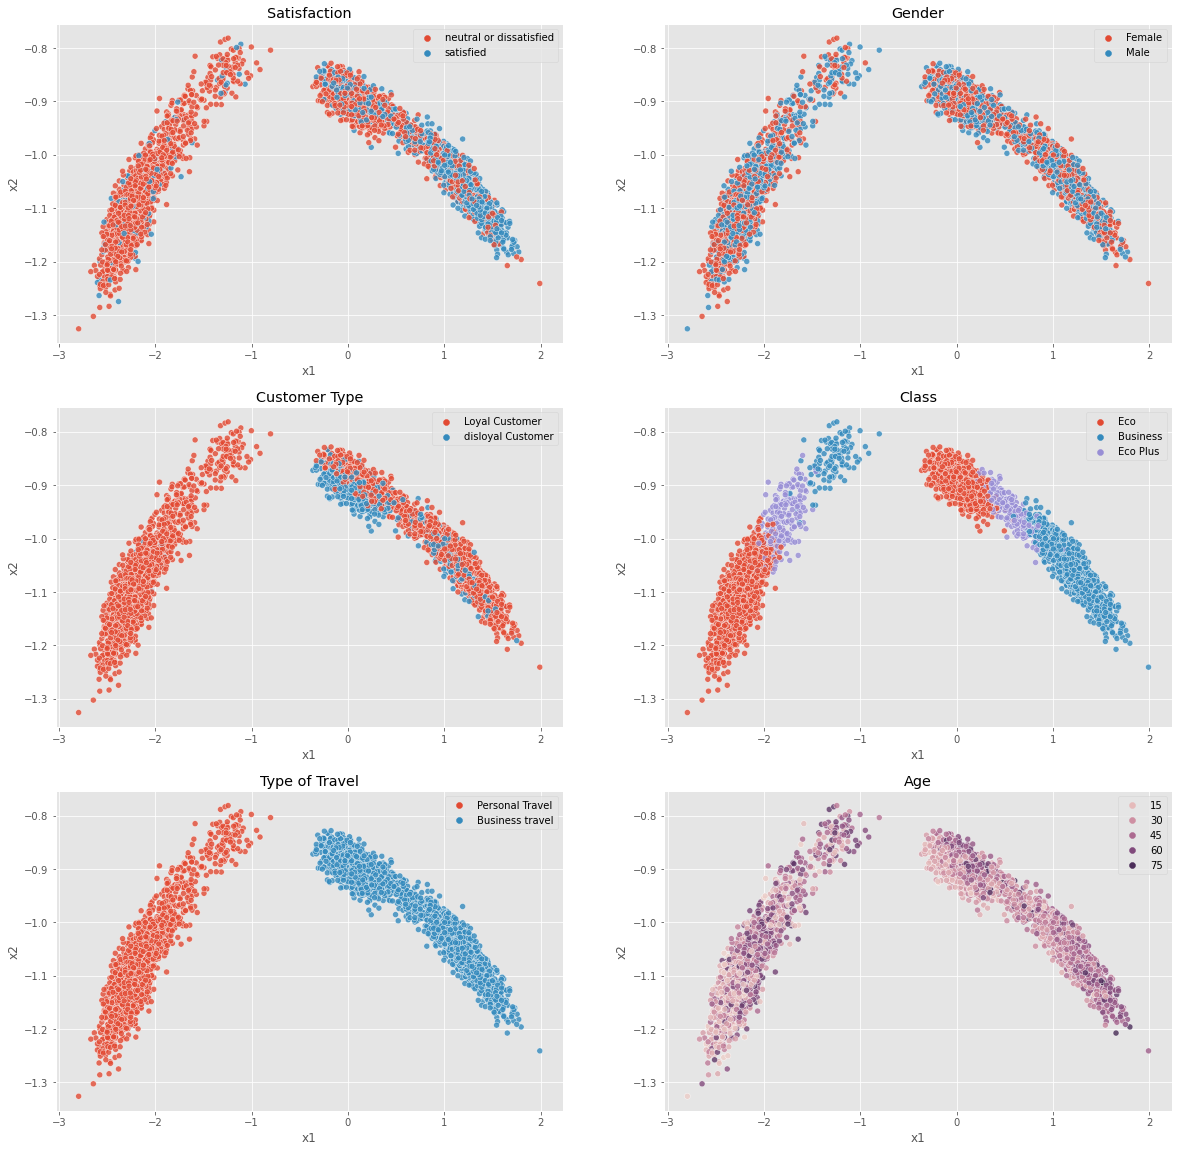

In [39]:
fig = plt.subplots(figsize=(20,20))

plt.subplot(321)
sns.scatterplot(x=Z.x1,y=Z.x2,hue=df['satisfaction'],alpha=0.8)
plt.title('Satisfaction')
plt.legend()

plt.subplot(322)
sns.scatterplot(x=Z.x1,y=Z.x2,hue=df['Gender'],alpha=0.8)
plt.title('Gender')
plt.legend()

plt.subplot(323)
sns.scatterplot(x=Z.x1,y=Z.x2,hue=df['Customer Type'],alpha=0.8)
plt.title('Customer Type')
plt.legend()

plt.subplot(324)
sns.scatterplot(x=Z.x1,y=Z.x2,hue=df['Class'],alpha=0.8)
plt.title('Class')
plt.legend()

plt.subplot(325)
sns.scatterplot(x=Z.x1,y=Z.x2,hue=df['Type of Travel'],alpha=0.8)
plt.title('Type of Travel')
plt.legend()

plt.subplot(326)
sns.scatterplot(x=Z.x1,y=Z.x2,hue=df['Age'],alpha=0.8)
plt.title('Age')
plt.legend()

plt.show()
